## Installing the Shap software

In [32]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\bayka\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [78]:
import xgboost as xgb
import shap
import pandas as pd

df = pd.read_csv("df_sum_score.csv")
X = df.drop(['COL_GRADE_AVG','GENDER','Unnamed: 0','CR_S11','CC_S11','ENG_S11','CR_PRO','CC_PRO','ENG_PRO'], axis=1).copy()
y=df['COL_GRADE_AVG'].copy()
X_encoded = pd.get_dummies(X,columns=['STRATUM'])

X_encoded = X_encoded.drop(['STRATUM_0'], axis=1).copy()



# # without sensitive attributes
# X = df.drop(['COL_GRADE_AVG','GENDER','Unnamed: 0','CR_S11','CC_S11','ENG_S11','CR_PRO','CC_PRO','ENG_PRO', 'STRATUM','GENDER_bin'], axis=1).copy()
# y = df['COL_GRADE_AVG'].copy()
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24, test_size=0.33)#, stratify=y)

In [79]:
import matplotlib as mpl
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (6,3)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()
# from matplotlib import rcParams


In [80]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=24, test_size=0.33)#, stratify=y)

final_model = xgb.XGBRegressor(seed=24, objective='reg:squarederror', max_depth=3, learning_rate=0.05, gamma=0,reg_lambda=15.0, scale_pos_weight=0.01)
final_model.fit(X_train,y_train,verbose=True, eval_metric='rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=24,
             reg_alpha=0, reg_lambda=15.0, scale_pos_weight=0.01, seed=24,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [81]:
import matplotlib.pyplot as plt
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(final_model)
shap_values = explainer(X_train)

# # visualize the first prediction's explanation
# for i in range(4):
#     shap.plots.waterfall(shap_values[i], show = False)
#     plt.savefig("shap_plot" + str(i) + ".png")

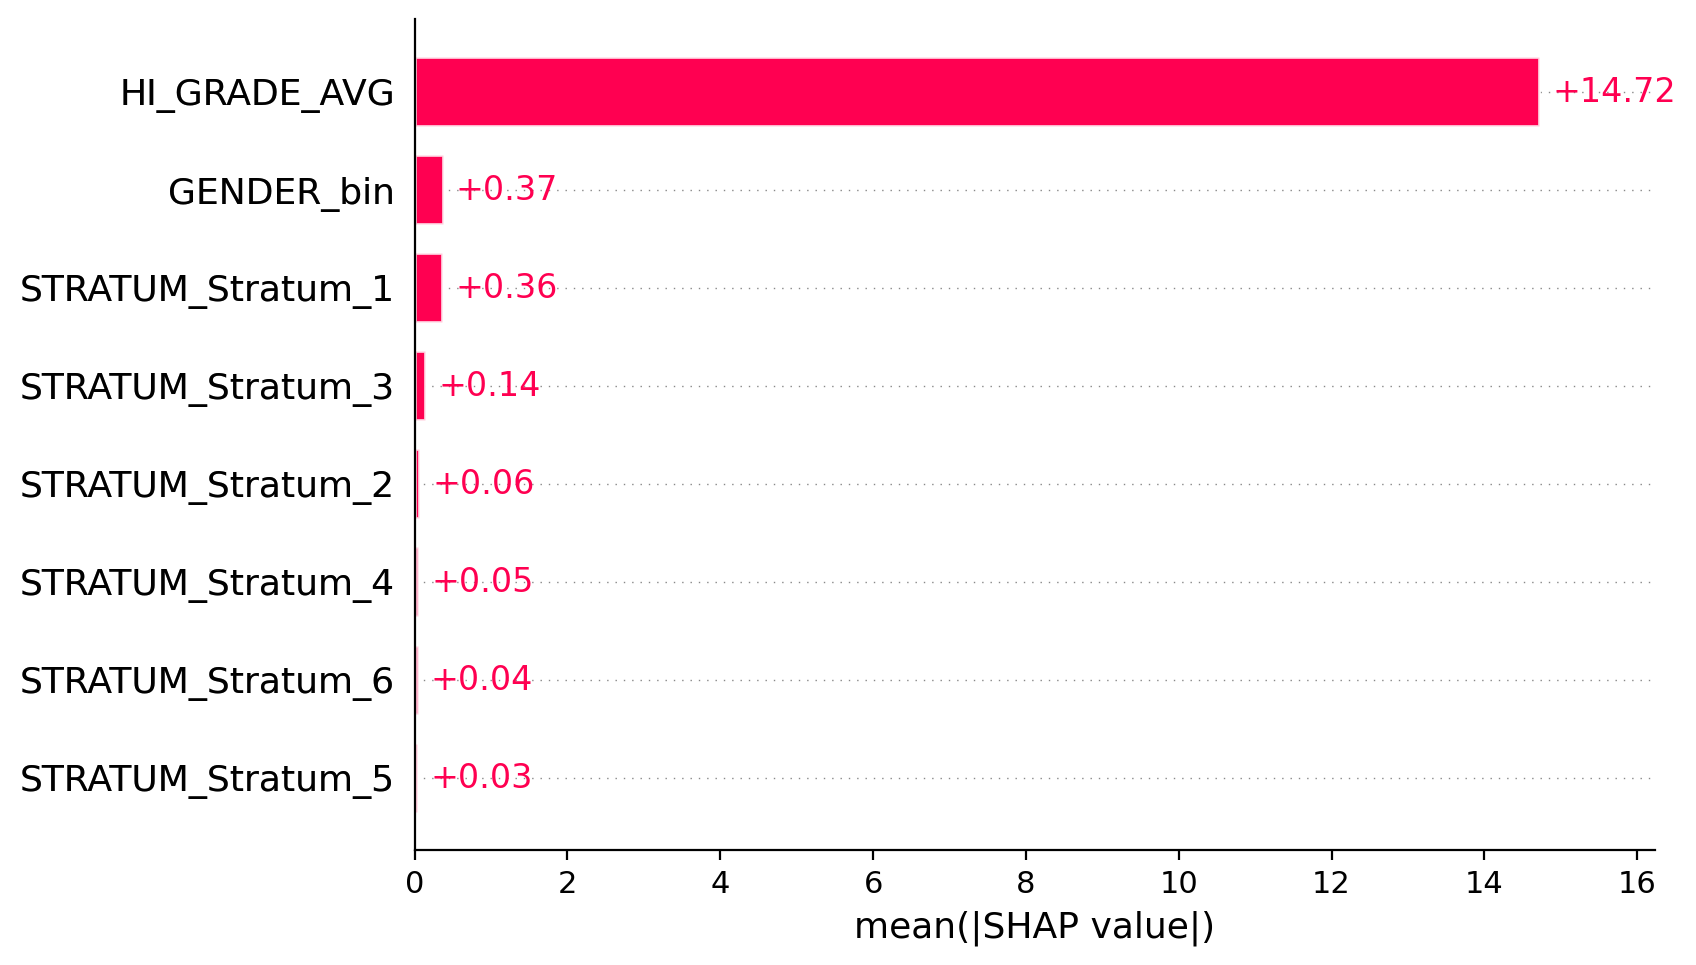

In [82]:
shap.plots.bar(shap_values,show='False')

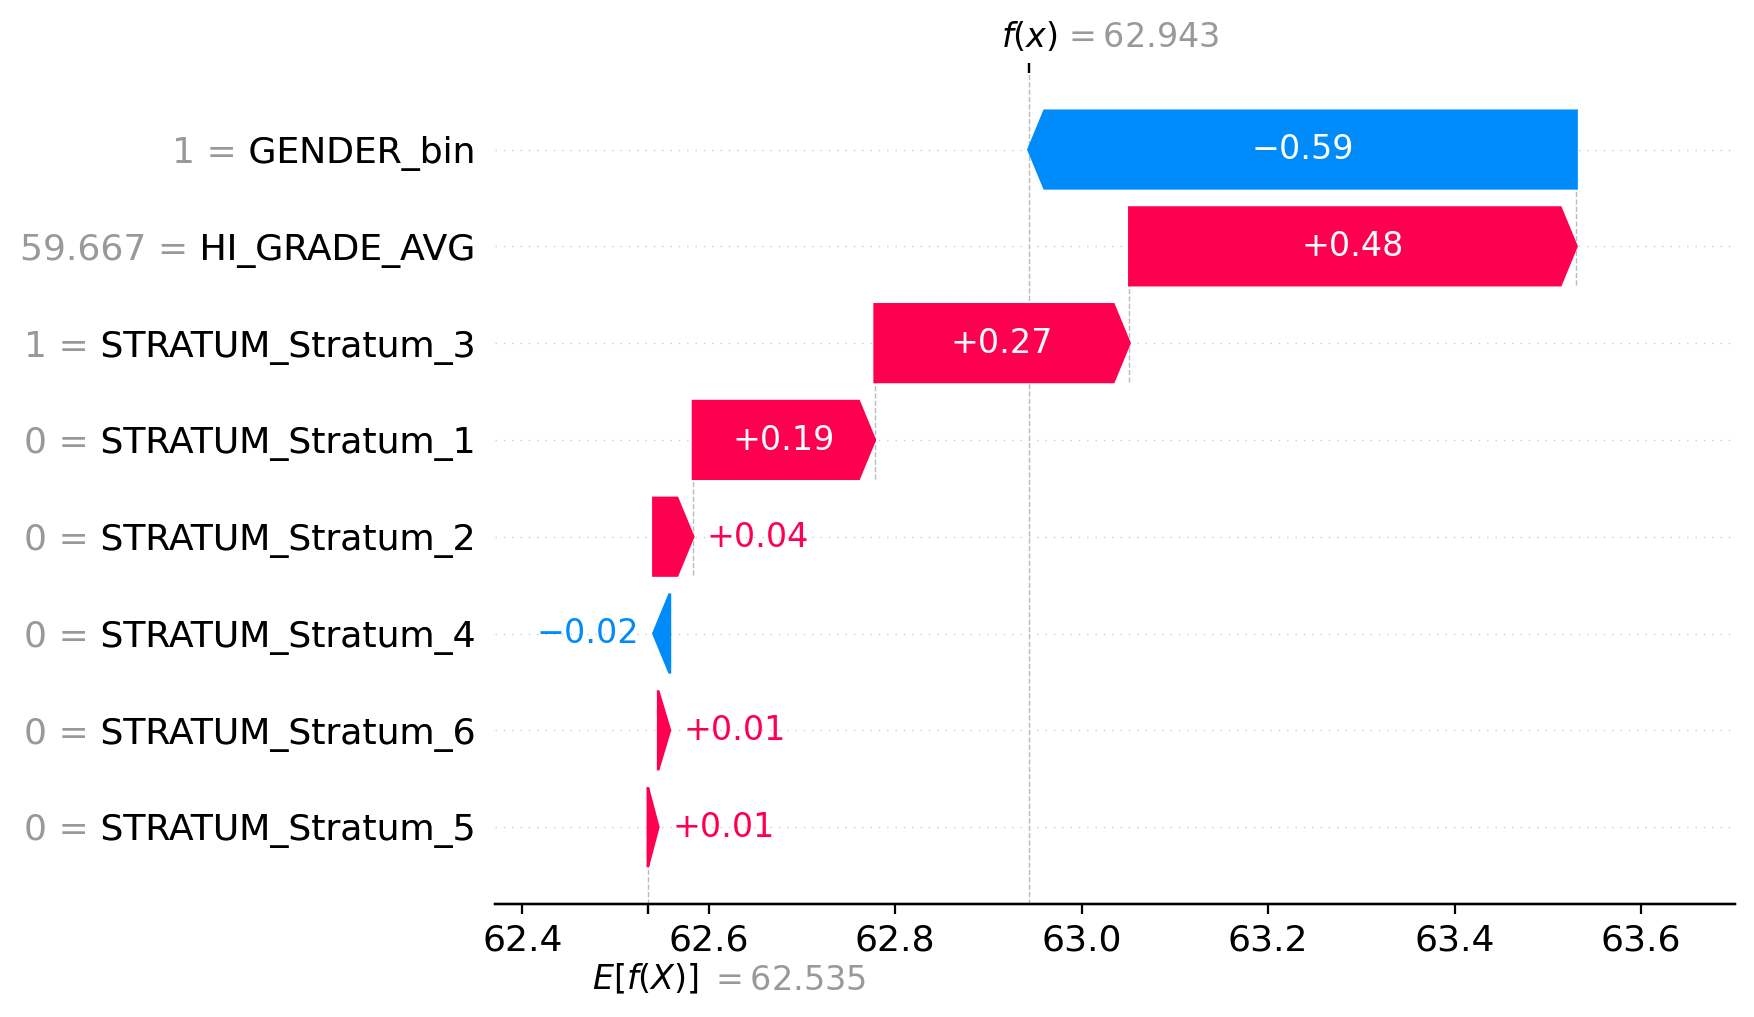

In [83]:
shap.plots.waterfall(shap_values[1], show=False)
plt.savefig("shap_plot_1.png", bbox_inches='tight')


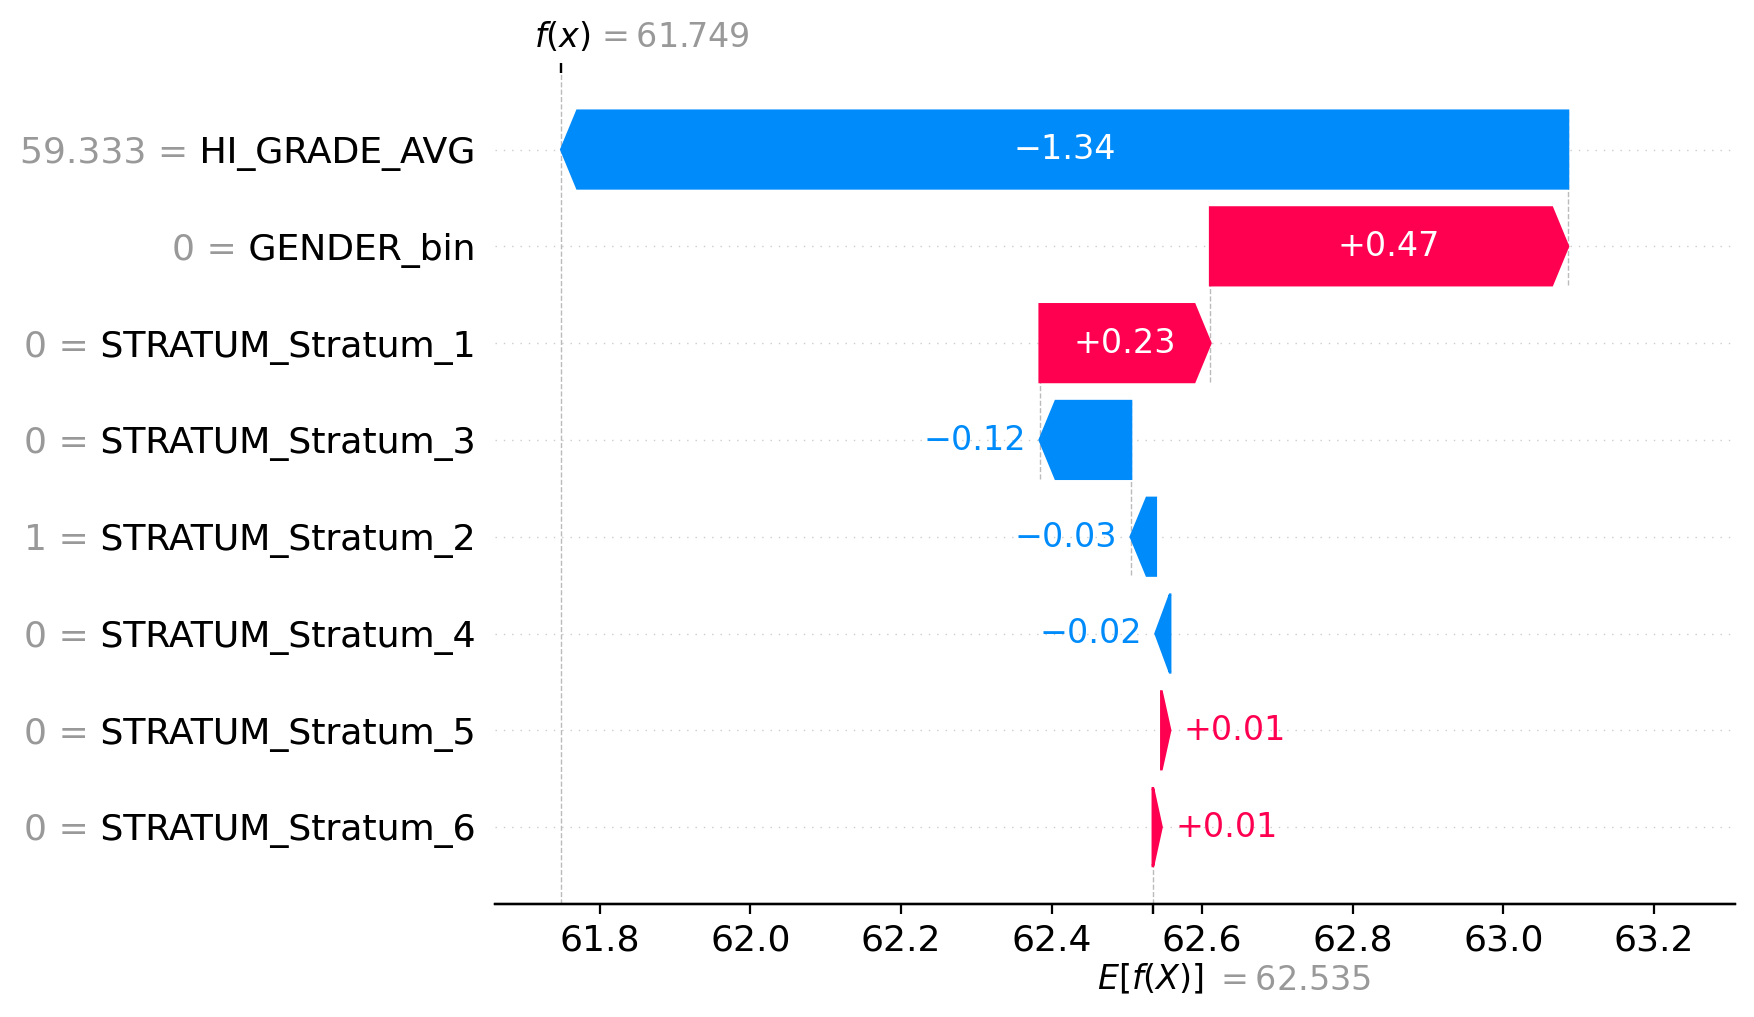

In [84]:

shap.plots.waterfall(shap_values[2], show=False)
plt.savefig("shap_plot_2.png", bbox_inches='tight')


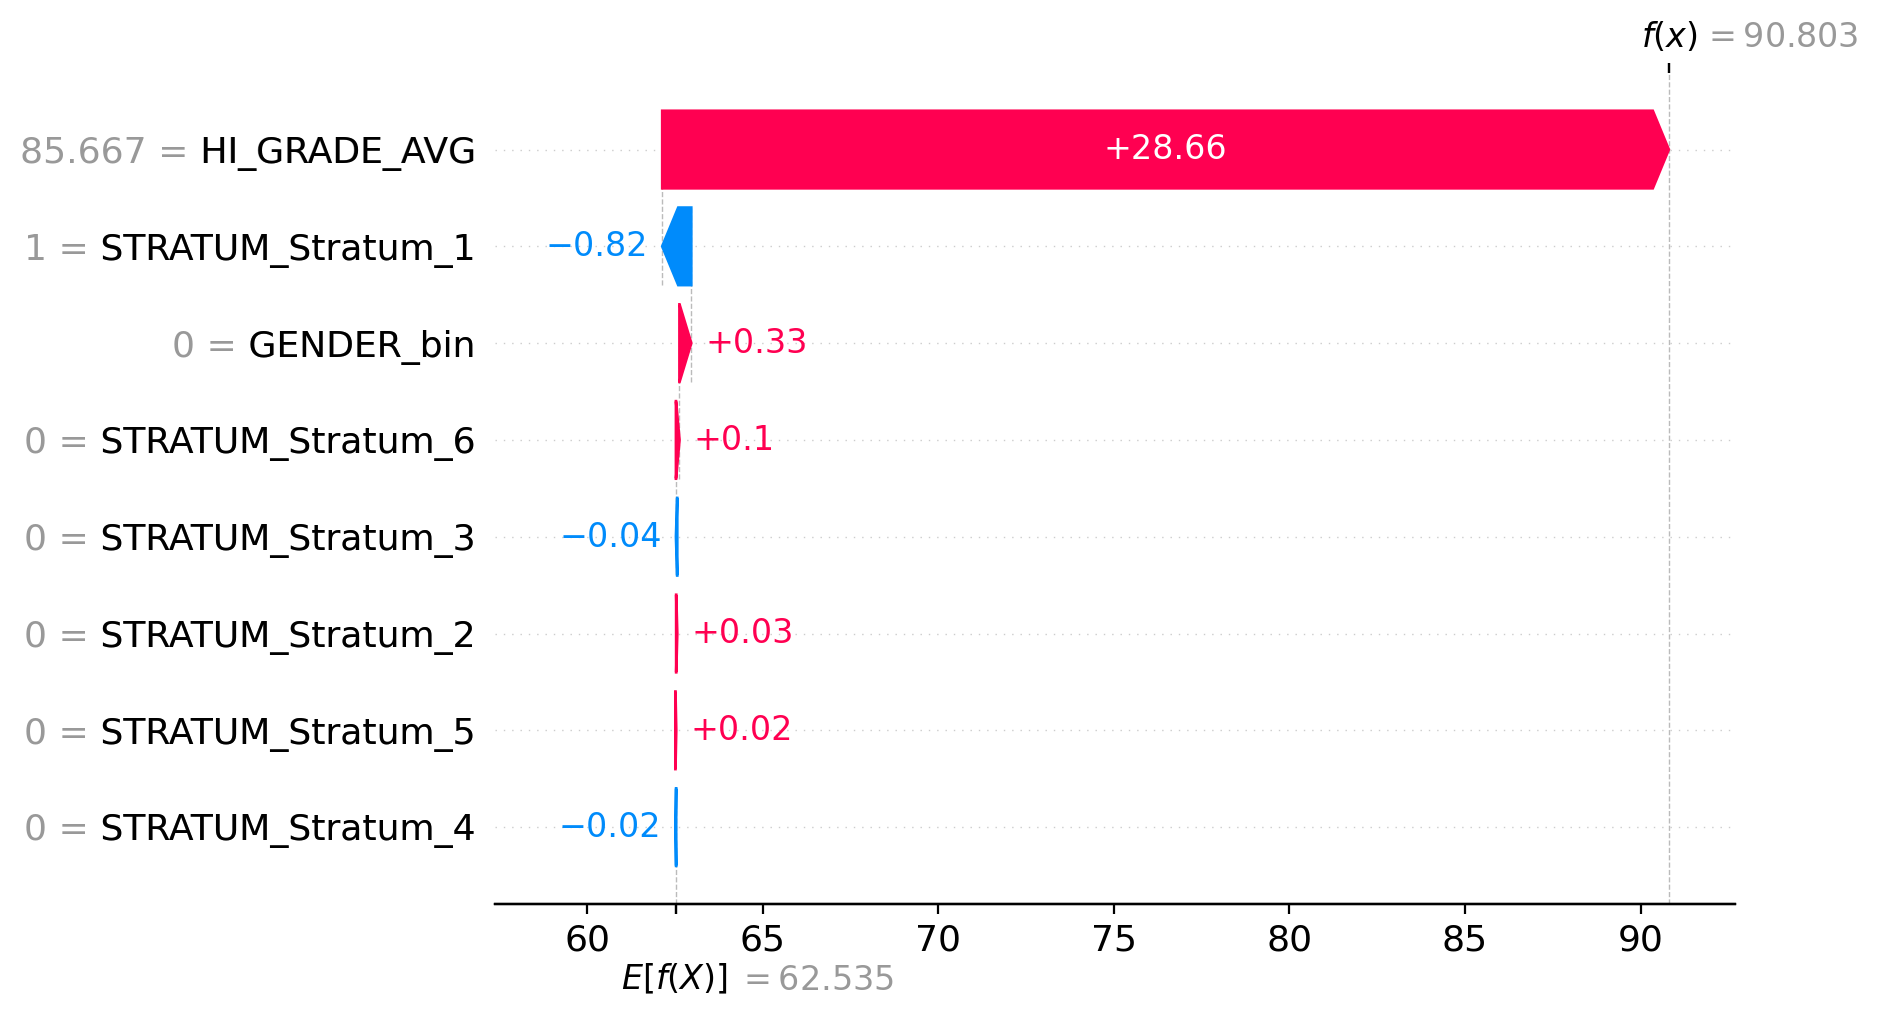

In [85]:

shap.plots.waterfall(shap_values[3], show=False)
plt.savefig("shap_plot_3.png", bbox_inches='tight')


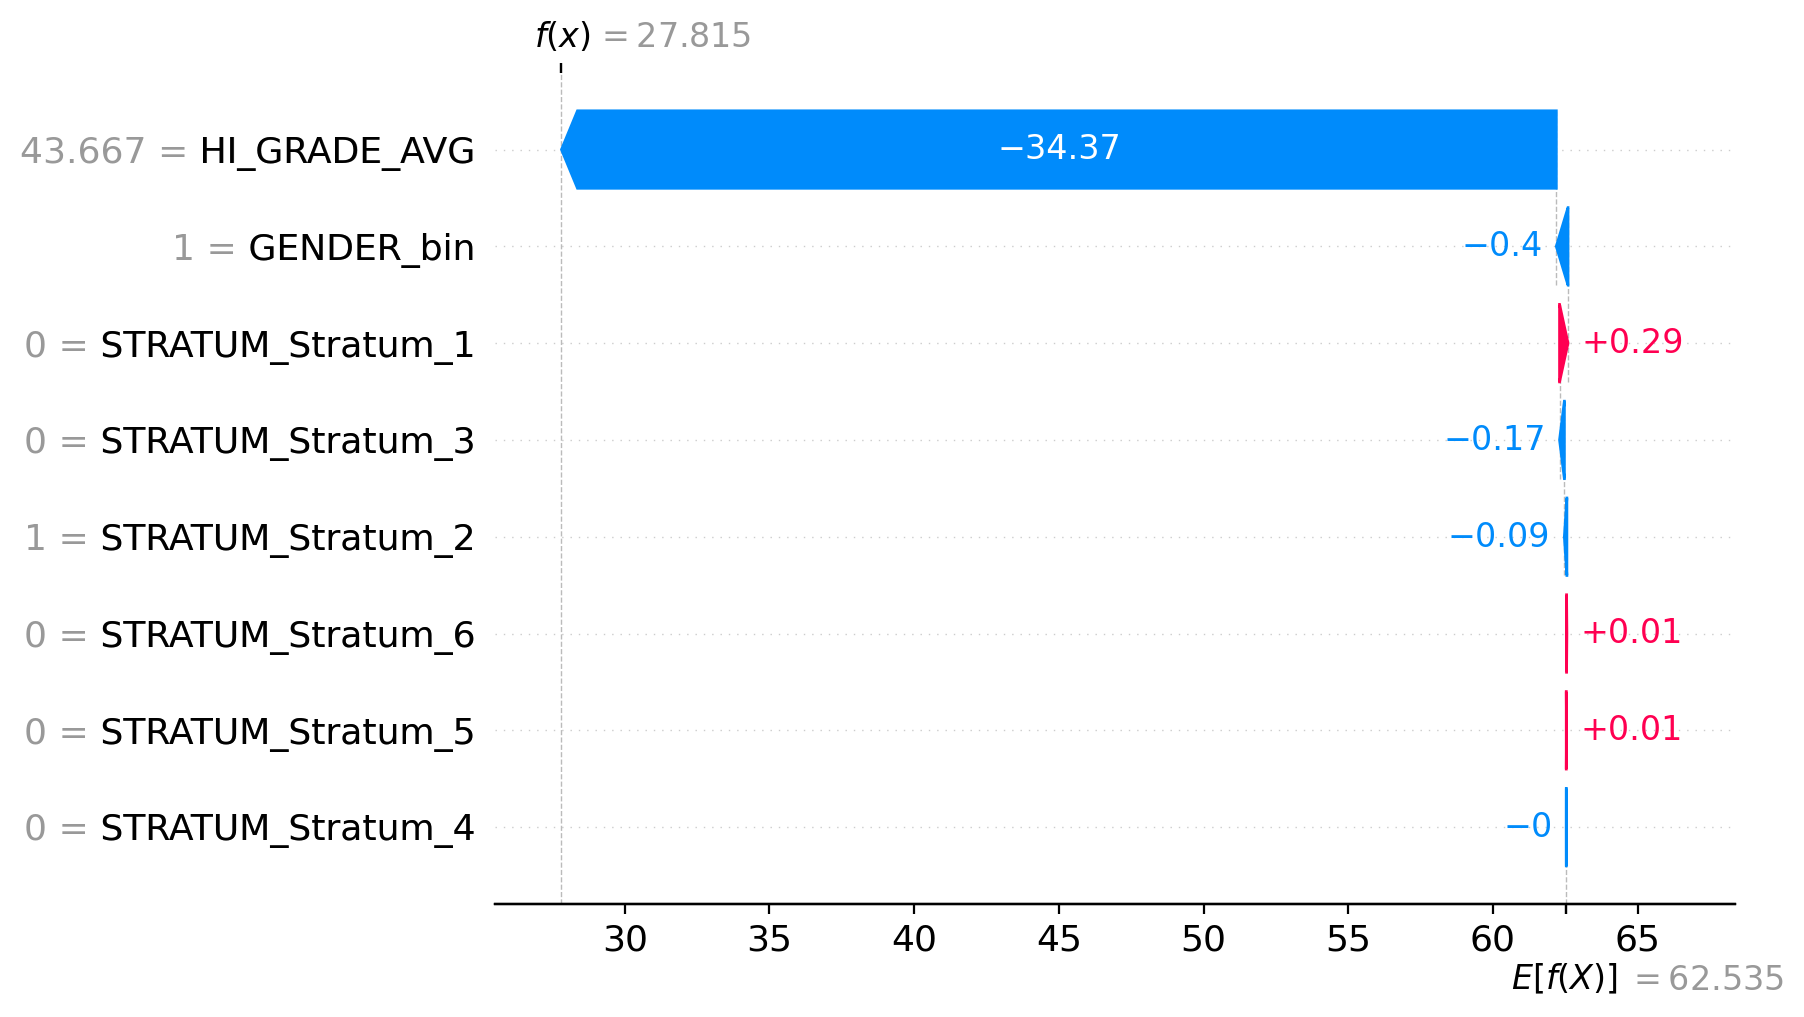

In [86]:

shap.plots.waterfall(shap_values[4], show=False)
plt.savefig("shap_plot_4.png", bbox_inches='tight')

In [87]:
shap.TreeExplainer(final_model).shap_interaction_values(X_train)

array([[[-2.5528357e+01, -6.9315881e-02,  1.2482518e-01, ...,
         -1.5668679e-02, -9.4771720e-03, -1.3877505e-02],
        [-6.9314957e-02,  3.2447737e-01, -6.9416165e-03, ...,
          6.6128746e-04,  0.0000000e+00,  1.5091896e-04],
        [ 1.2482262e-01, -6.9415644e-03, -1.3325888e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-1.5667915e-02,  6.6128373e-04,  0.0000000e+00, ...,
         -2.5613330e-02,  0.0000000e+00,  0.0000000e+00],
        [-9.4757080e-03,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  1.8716134e-02,  0.0000000e+00],
        [-1.3877869e-02,  1.5091896e-04,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  2.5433619e-02]],

       [[ 6.6508132e-01, -1.6974923e-01, -1.9058935e-02, ...,
          6.8250219e-03, -6.9823721e-03, -1.3280999e-02],
        [-1.6974926e-01, -4.3954116e-01, -1.5664026e-03, ...,
         -2.3525022e-04,  0.0000000e+00, -2.2129714e-04],
        [-1.9059032e-02, 

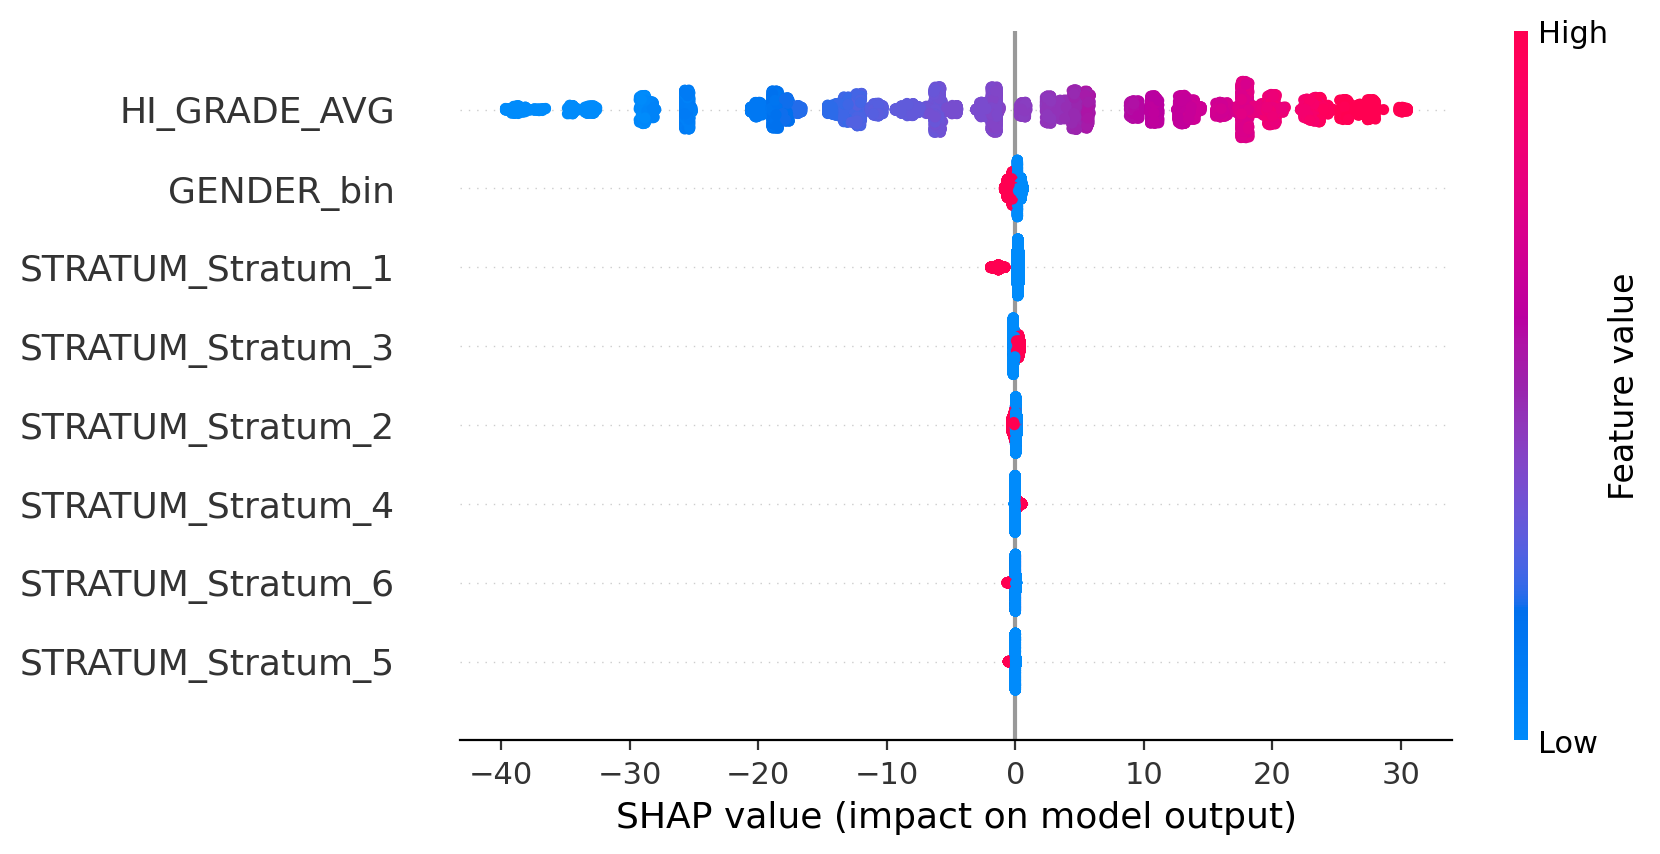

In [88]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (10,3)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()
import matplotlib.pylab as pl
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, show=False)
# pl.xlim(-2.01,2)
# plt.savefig("shap_plot_all_zoom.png", bbox_inches='tight')
pl.show()


Of this plot we can see that according to the model the feature yielding most information about an individual's average college grade is their high school average grade. The second most important feature, when predicting the college grade is the gender, accoring to the model.

The color shows the value of the feature, and the position on the horizontal axis shows what impact this feature value would have on the model's decision. Looking at the 

In [89]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

# see how well we can order people by survival
c_statistic_harrell(model_train.predict(xgb_test, ntree_limit=5000), y_test)

NameError: name 'model_train' is not defined